# Constructing a threshold model based on HST x PS1 (Mean) catalog

Same as 'Constructing a threshold model based on HST x PS1 (Stack) catalog' but using HST x PS1 (Mean) catalog

In [20]:
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline
hst_ps1 = pd.read_csv('HST_PS1_mean_tachibana.csv')

Discarding duplicated data

In [21]:
cat = hst_ps1.drop_duplicates(['objID'])
print 'data length %d -> %d' %(len(hst_ps1), len(cat))
del hst_ps1

data length 45788 -> 44933


In [22]:
def plt_hexbin_star_galaxy(xval1, yval1, xval2, yval2, extent, xlab, ylab, 
                           zval=None, vmin=None, vmax=None, zlab=None, bins=None, grid=100, 
                           xscale1='linear', yscale1='linear', xscale2='linear', yscale2='linear', title1='STAR', title2='GALAXY'):
    font = 'sans-serif'
    plt.figure(figsize=(17,4))
    plt.subplot(1,2,1)
    plt.hexbin(xval1, yval1, zval, vmin=vmin, vmax=vmax, extent=extent, cmap='gnuplot', bins=bins, gridsize=grid)
    plt.xscale(xscale1); plt.yscale(yscale1)
    plt.xlim(extent[0:2]); plt.ylim(extent[2:4])
    plt.colorbar().set_label(zlab, fontname='serif', fontsize=15)
    plt.title(title1, fontname=font, fontsize=25)
    plt.xlabel(xlab, fontname=font, fontsize=15)
    plt.ylabel(ylab, fontname=font, fontsize=15)
    plt.subplot(1,2,2)
    plt.hexbin(xval2, yval2, zval, vmin=vmin, vmax=vmax, extent=extent, cmap='gnuplot', bins=bins, gridsize=grid)
    plt.xscale(xscale2); plt.yscale(yscale2)
    plt.xlim(extent[0:2]); plt.ylim(extent[2:4])
    plt.colorbar().set_label(zlab, fontname='serif', fontsize=15)
    plt.title(title2, fontname=font, fontsize=25)
    plt.xlabel(xlab, fontname=font, fontsize=15)
    plt.ylabel(ylab, fontname=font, fontsize=15)

def plt_scatter_star_galaxy(xval1, yval1, xval2, yval2, extent, xlab, ylab, 
                           xscale1='linear', yscale1='linear', xscale2='linear', yscale2='linear', 
                           title1 = 'STAR', title2='GALAXY', alpha = 1, color='blue'):
    font = 'sans-serif'
    plt.figure(figsize=(17,4))
    plt.subplot(1,2,1)
    plt.scatter(xval1, yval1, alpha=alpha, color=color)
    plt.xscale(xscale1); plt.yscale(yscale1)
    plt.xlim(extent[0:2]); plt.ylim(extent[2:4])
    plt.title(title1, fontname=font, fontsize=25)
    plt.xlabel(xlab, fontname=font, fontsize=15)
    plt.ylabel(ylab, fontname=font, fontsize=15)
    plt.subplot(1,2,2)
    plt.scatter(xval2, yval2, alpha=alpha, color=color)
    plt.xscale(xscale2); plt.yscale(yscale2)
    plt.xlim(extent[0:2]); plt.ylim(extent[2:4])
    plt.title(title2, fontname=font, fontsize=25)
    plt.xlabel(xlab, fontname=font, fontsize=15)
    plt.ylabel(ylab, fontname=font, fontsize=15)

In [23]:
star, galaxy = cat.MU_CLASS == 2, cat.MU_CLASS == 1

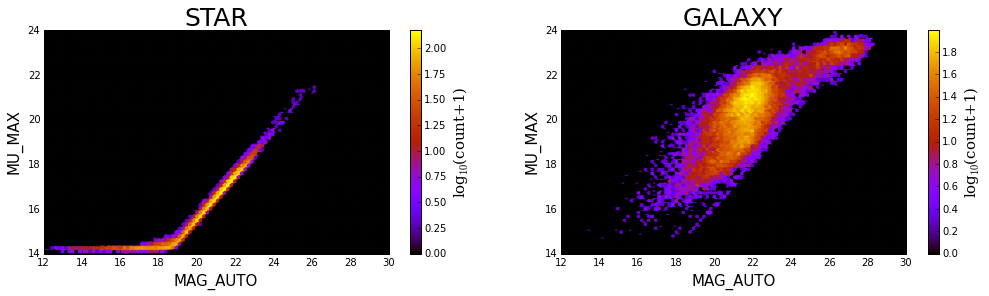

In [24]:
xval1 = cat.MAG_AUTO[star]; yval1 = cat.MU_MAX[star]
xval2 = cat.MAG_AUTO[galaxy]; yval2 = cat.MU_MAX[galaxy]
extent = [12,30,14,24]
xlab = 'MAG_AUTO'; ylab = 'MU_MAX'; zlab='log$_{10}$(count+1)'

plt_hexbin_star_galaxy(xval1, yval1, xval2, yval2, extent, xlab, ylab, zlab=zlab, bins='log')
plt.show(); plt.close()

In galaxy, brightnesses in some sources are calculated to be fainter than 25 mag. 
It might be due to 'contamination' of a faint source within the crossmating region (this time 0.5 arcsec) which cannot be detected by PS1. 
I tentatively cut these source fainter than 24.5 mag in MAG_AUTO. 

In [25]:
mag_mask = cat.MAG_AUTO <= 24.5
star = star&mag_mask; galaxy = galaxy&mag_mask

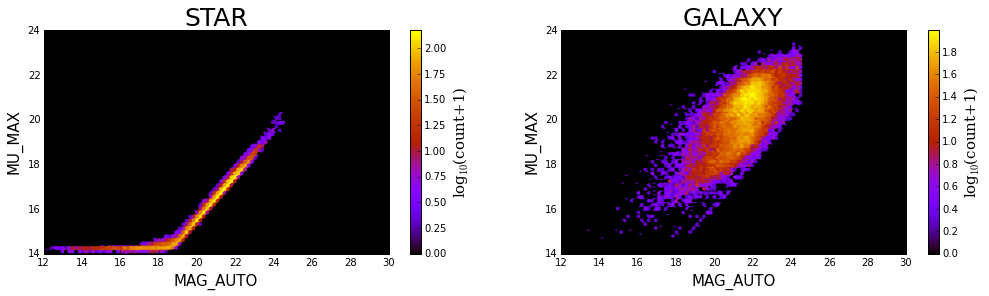

In [26]:
xval1 = cat.MAG_AUTO[star]; yval1 = cat.MU_MAX[star]
xval2 = cat.MAG_AUTO[galaxy]; yval2 = cat.MU_MAX[galaxy]
plt_hexbin_star_galaxy(xval1, yval1, xval2, yval2, extent, xlab, ylab, zlab=zlab, bins='log')
plt.show(); plt.close()

In [27]:
print 'data length %d -> %d' %(len(cat), len(cat[mag_mask]))
cat = cat[mag_mask]

data length 44933 -> 41512


 I intend to include uncertainties in brightness and psfKronRatio for constructing criteria of star/galaxy sparation thus modified the code for calculating the error in psfKronRatio. 

In [12]:
cat.gMeanPSFMag

,MAG_AUTO,MAGERR_AUTO,MAG_BEST,MAGERR_BEST,KRON_RADIUS,FWHM_IMAGE,MU_MAX,CLASS_STAR,MU_CLASS,objID,...,gMeanKronMagErr,rMeanKronMag,rMeanKronMagErr,iMeanKronMag,iMeanKronMagErr,zMeanKronMag,zMeanKronMagErr,yMeanKronMag,yMeanKronMagErr,Column1
0,22.517223,0.011435,22.517223,0.011439,4.242650,13.148605,20.497217,0.028073,1,109881495927824692,...,0.177131,22.486099,0.053374,-999.000000,-999.000000,-999.000000,-999.000000,-999.0000,-999.000000,0.146668
1,21.082811,0.006105,21.082811,0.006107,3.861765,32.668663,19.958809,0.027856,1,109881495969889066,...,-999.000000,21.748400,0.155801,20.974501,0.066508,20.785400,0.097196,-999.0000,-999.000000,0.227454
3,22.222277,0.019011,22.222277,0.019016,5.608570,36.288643,21.648720,0.000388,1,109891495349868802,...,-999.000000,20.658800,0.297738,20.405500,0.135838,21.195801,0.304071,-999.0000,-999.000000,0.507311
4,20.977619,0.004298,20.977619,0.004300,4.162336,7.771351,18.466242,0.028688,1,109891495557280130,...,-999.000000,21.932800,0.073089,21.087799,0.109310,20.467899,0.064198,20.7992,0.321558,0.052204
5,22.146946,0.013792,22.146946,0.013796,4.434428,53.403191,21.273281,0.000567,1,109891495580603317,...,-999.000000,22.909800,0.250515,-999.000000,-999.000000,-999.000000,-999.000000,-999.0000,-999.000000,0.299581


In [13]:
def calc_psfKronRatio(catalog):
    filter_name =  ['g', 'r', 'i', 'z', 'y']
    psfmag_name = 'MeanPSFMag'
    kronmag_name = 'MeanKronMag'
    psfmagerr_name = 'MeanPSFMagErr'
    kronmagerr_name = 'MeanKronMagErr'
    psfmag_list = []
    kronmag_list = []
    psfmagerr_list = []
    kronmagerr_list = []
    for fil in filter_name:
        psfmag_list.append(fil+psfmag_name)
        kronmag_list.append(fil+kronmag_name)
        psfmagerr_list.append(fil+psfmagerr_name)
        kronmagerr_list.append(fil+kronmagerr_name)
    mag_list = psfmag_list + kronmag_list + psfmagerr_list + kronmagerr_list
    PS_mag = cat[mag_list]
    weight_norm = np.zeros(len(PS_mag))
    det_num = np.zeros(len(PS_mag))
    mean_flux_ratio_w =np.zeros(len(PS_mag))
    mean_flux_ratioerr_w =np.zeros(len(PS_mag))

    for fil in filter_name:
        psf_col_name = fil + psfmag_name
        kron_col_name = fil + kronmag_name
        psferr_col_name = fil + psfmagerr_name
        kronerr_col_name = fil + kronmagerr_name

        psf_det_flux = np.power(10, -0.4*(PS_mag[psf_col_name].values + 48.6),                                               
                                                  out = np.zeros_like(mean_flux_ratio_w),
                                                  where = PS_mag[psf_col_name].values != -999)/1e-27

        kron_det_flux = np.power(10, -0.4*(PS_mag[kron_col_name].values + 48.6),
                                                  out = np.zeros_like(mean_flux_ratio_w),
                                                  where = PS_mag[kron_col_name].values != -999)/1e-27

        psferr_det_flux = np.multiply(0.4*np.log(10), psf_det_flux*PS_mag[psferr_col_name],                                               
                                                  out = np.zeros_like(mean_flux_ratio_w),
                                                  where = PS_mag[psf_col_name].values != -999)

        kronerr_det_flux = np.multiply(0.4*np.log(10), kron_det_flux*PS_mag[kronerr_col_name],
                                                  out = np.zeros_like(mean_flux_ratio_w),
                                                  where = PS_mag[kron_col_name].values != -999)

        psf_det_NS = np.divide(psferr_det_flux, psf_det_flux,
                                                  out = np.zeros_like(mean_flux_ratio_w),
                                                  where = PS_mag[psf_col_name].values != -999)

        kron_det_NS = np.divide(kronerr_det_flux, kron_det_flux,
                                                  out = np.zeros_like(mean_flux_ratio_w),
                                                  where = PS_mag[kron_col_name].values != -999)

        mask = (psf_det_flux!=0)&(kron_det_flux!=0)

        flux_ratio = np.divide(psf_det_flux, kron_det_flux, 
                                                  out = np.zeros_like(mean_flux_ratio_w), 
                                                  where = mask)

        flux_ratio_err = np.multiply(flux_ratio, np.sqrt(psf_det_NS**2 +  kron_det_NS**2), 
                                                  out = np.zeros_like(mean_flux_ratio_w), 
                                                  where = mask)

        weight = np.divide(1, flux_ratio_err**2, 
                                                  out = np.zeros_like(mean_flux_ratio_w), 
                                                  where = mask)

        flux_ratio_w = np.multiply(flux_ratio, weight, 
                                                  out = np.zeros_like(mean_flux_ratio_w), 
                                                  where = mask)

        flux_ratioerr_w = np.multiply(flux_ratio_err, weight, 
                                                  out = np.zeros_like(mean_flux_ratio_w), 
                                                  where = mask)

        mean_flux_ratio_w += flux_ratio_w
        mean_flux_ratioerr_w += flux_ratioerr_w
        weight_norm += weight
        det_num += mask.astype(int)

    mask = (mean_flux_ratio_w != 0)&(weight_norm != 0)
    mean_flux_ratio = np.divide(mean_flux_ratio_w, weight_norm, 
                             out = np.zeros_like(mean_flux_ratio_w), 
                             where = mask)
    mean_flux_ratioerr = np.divide(mean_flux_ratioerr_w, weight_norm*np.sqrt(det_num), 
                             out = np.zeros_like(mean_flux_ratio_w), 
                             where = mask)
    
    ratio_kwargs = {'mean_psfKronRatio' : mean_flux_ratio}
    ratioerr_kwargs = {'mean_psfKronRatioerr' : mean_flux_ratioerr}
    PS_mag = PS_mag.assign(**ratio_kwargs); PS_mag = PS_mag.assign(**ratioerr_kwargs)
    return PS_mag

In [37]:
star, galaxy = cat.MU_CLASS == 2, cat.MU_CLASS == 1
GT = cat.MU_CLASS
GT_kwargs = {'mu_class' : GT.values}
PS_mag = calc_psfKronRatio(cat)
PS_mag = PS_mag.assign(**GT_kwargs)
del cat

In [15]:
PS_mag[0:5]

,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,gMeanKronMag,rMeanKronMag,iMeanKronMag,zMeanKronMag,yMeanKronMag,...,zMeanPSFMagErr,yMeanPSFMagErr,gMeanKronMagErr,rMeanKronMagErr,iMeanKronMagErr,zMeanKronMagErr,yMeanKronMagErr,mean_psfKronRatio,mean_psfKronRatioerr,mu_class
0,22.8062,22.716900,-999.000000,-999.000000,-999.0000,22.292,22.486099,-999.000000,-999.000000,-999.0000,...,-999.000000,-999.000000,0.177131,0.053374,-999.000000,-999.000000,-999.000000,0.769357,0.046093,1
1,-999.0000,21.610201,21.488501,21.053400,-999.0000,-999.000,21.748400,20.974501,20.785400,-999.0000,...,0.150177,-999.000000,-999.000000,0.155801,0.066508,0.097196,-999.000000,0.678055,0.041879,1
3,-999.0000,21.610701,21.470600,21.057699,-999.0000,-999.000,20.658800,20.405500,21.195801,-999.0000,...,0.211340,-999.000000,-999.000000,0.297738,0.135838,0.304071,-999.000000,0.403653,0.051627,1
4,-999.0000,22.244600,21.272400,20.850300,20.5958,-999.000,21.932800,21.087799,20.467899,20.7992,...,0.033370,0.175597,-999.000000,0.073089,0.109310,0.064198,0.321558,0.740261,0.029588,1
5,-999.0000,22.929001,-999.000000,-999.000000,-999.0000,-999.000,22.909800,-999.000000,-999.000000,-999.0000,...,-999.000000,-999.000000,-999.000000,0.250515,-999.000000,-999.000000,-999.000000,0.982470,0.252225,1


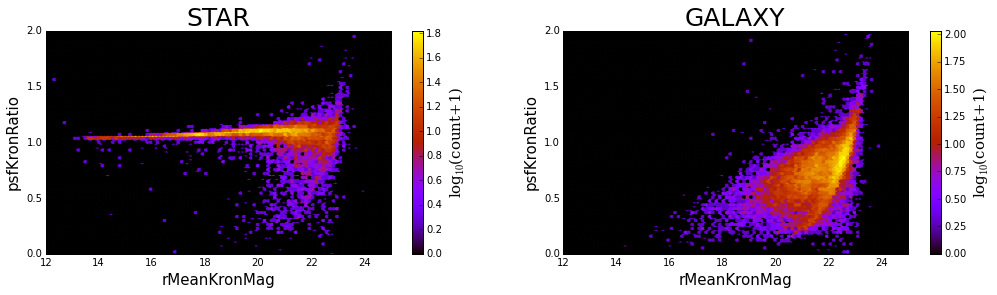

In [17]:
xval1 = PS_mag.rMeanKronMag[star]; yval1 = PS_mag.mean_psfKronRatio[star]
xval2 = PS_mag.rMeanKronMag[galaxy]; yval2 = PS_mag.mean_psfKronRatio[galaxy]
extent = [12,25,0,2]
xlab = 'rMeanKronMag'; ylab = 'psfKronRatio'; zlab='log$_{10}$(count+1)'

plt_hexbin_star_galaxy(xval1, yval1, xval2, yval2, extent, xlab, ylab, zlab=zlab, bins='log')
plt.show(); plt.close()

Uncertainty in psfKronRatio $\Delta R$ is calculated by 

$\Delta R = R \times \sqrt{\left(\frac{\Delta x_1}{x_1}\right)^2 + \left(\frac{\Delta x_2}{x_2}\right)^2} \propto R$

where $x_1$ and $x_2$ is rPsfFlux and rKronFlux respectively. 
Variation in $R$ proportional to itself probably makes the distribution distorting upward exponentially in fainter side. 

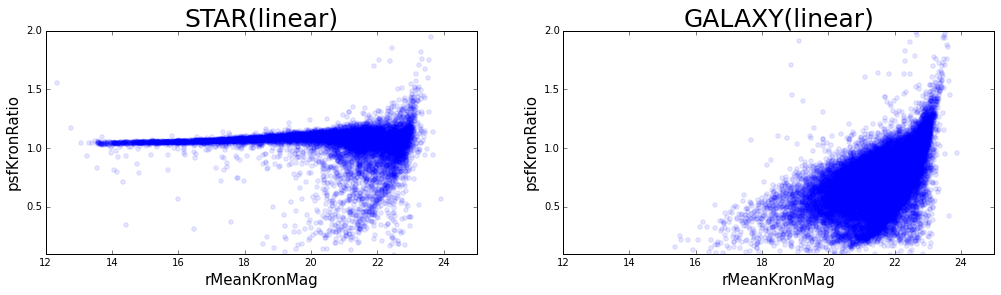

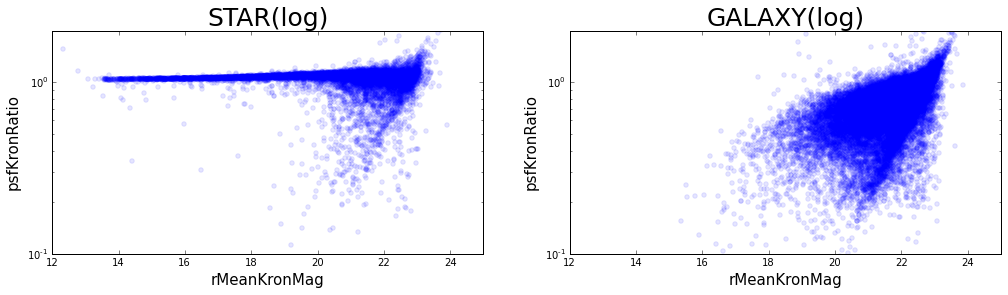

In [18]:
rdet = PS_mag.rMeanKronMag!=-999
Rdet = (PS_mag.mean_psfKronRatio!=0)&(np.isnan(PS_mag.mean_psfKronRatio)==False)
det = rdet&Rdet

xval1 = PS_mag.rMeanKronMag[star&det]; yval1 = PS_mag.mean_psfKronRatio[star&det]
xval2 = PS_mag.rMeanKronMag[galaxy&det]; yval2 = PS_mag.mean_psfKronRatio[galaxy&det]
extent = [12,25,1e-1,2]

plt_scatter_star_galaxy(xval1, yval1, xval2, yval2, extent,xlab = 'rMeanKronMag', ylab = 'psfKronRatio',  
                        title1='STAR(linear)', title2='GALAXY(linear)', alpha=0.1)
plt.show(); plt.close()
plt_scatter_star_galaxy(xval1, yval1, xval2, yval2, extent,xlab = 'rMeanKronMag', ylab = 'psfKronRatio',  
                        title1='STAR(log)', title2='GALAXY(log)', yscale1='log',  yscale2='log', alpha=0.1)
plt.show(); plt.close()

Converting

$R$ = [rPsfFlux]/[rKronFlux] 

to 

$\log_{10}R = \log_{10}$[rPsfFlux]$ - \log_{10}$[rKronFlux] 

for having a linear relationship with rKronMag and for (possibly) justification to separate star/galaxy by a linear threshold (it is proportional to [rPsfMag-rKronMag]).

In [41]:
log_ratio = np.log10(PS_mag.mean_psfKronRatio)
log_ratioerr = PS_mag.mean_psfKronRatioerr/PS_mag.mean_psfKronRatio/np.log(10)
logRatio_kwargs = {'LogPsfKronRatio' : log_ratio.values}
logRatioerr_kwargs = {'LogPsfKronRatioerr' : log_ratioerr.values}
PS_mag = PS_mag.assign(**logRatio_kwargs); PS_mag = PS_mag.assign(**logRatioerr_kwargs)
PS_mag[0:5]

,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,gMeanKronMag,rMeanKronMag,iMeanKronMag,zMeanKronMag,yMeanKronMag,...,gMeanKronMagErr,rMeanKronMagErr,iMeanKronMagErr,zMeanKronMagErr,yMeanKronMagErr,mean_psfKronRatio,mean_psfKronRatioerr,mu_class,LogPsfKronRatio,LogPsfKronRatioerr
0,22.8062,22.716900,-999.000000,-999.000000,-999.0000,22.292,22.486099,-999.000000,-999.000000,-999.0000,...,0.177131,0.053374,-999.000000,-999.000000,-999.000000,0.769357,0.046093,1,-0.113872,0.026019
1,-999.0000,21.610201,21.488501,21.053400,-999.0000,-999.000,21.748400,20.974501,20.785400,-999.0000,...,-999.000000,0.155801,0.066508,0.097196,-999.000000,0.678055,0.041879,1,-0.168735,0.026824
3,-999.0000,21.610701,21.470600,21.057699,-999.0000,-999.000,20.658800,20.405500,21.195801,-999.0000,...,-999.000000,0.297738,0.135838,0.304071,-999.000000,0.403653,0.051627,1,-0.393992,0.055546
4,-999.0000,22.244600,21.272400,20.850300,20.5958,-999.000,21.932800,21.087799,20.467899,20.7992,...,-999.000000,0.073089,0.109310,0.064198,0.321558,0.740261,0.029588,1,-0.130615,0.017358
5,-999.0000,22.929001,-999.000000,-999.000000,-999.0000,-999.000,22.909800,-999.000000,-999.000000,-999.0000,...,-999.000000,0.250515,-999.000000,-999.000000,-999.000000,0.982470,0.252225,1,-0.007681,0.111494


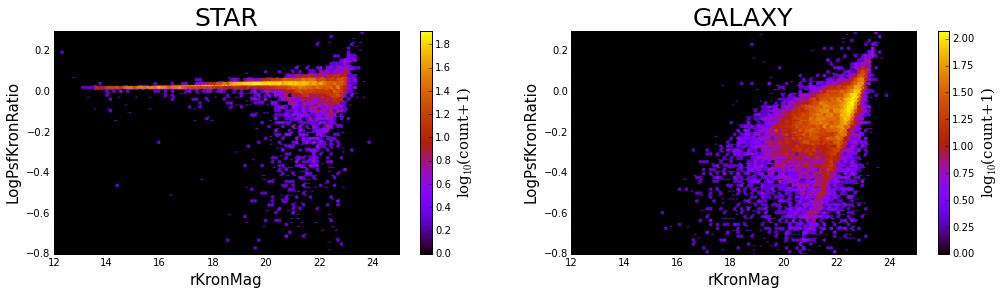

In [33]:
xval1 = PS_mag.rMeanKronMag[star&det]; yval1 = PS_mag.LogPsfKronRatio[star&det]
xval2 = PS_mag.rMeanKronMag[galaxy&det]; yval2 = PS_mag.LogPsfKronRatio[galaxy&det]
xlab = 'rKronMag'; ylab = 'LogPsfKronRatio'
extent = [12,25,-0.8,0.3]

plt_hexbin_star_galaxy(xval1, yval1, xval2, yval2, extent, xlab, ylab, zlab=zlab, bins='log')
plt.show(); plt.close()

## Determining the best parameter for each model with ACU
### Model1 :  Separating star/galaxy by above/beneath of a constant value. 
#### Model1.1: rKronMag vs. psfKronRatio

In [34]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from scipy.optimize import fmin, basinhopping

In [38]:
mag = PS_mag.rMeanKronMag[det]
mag_err = PS_mag.rMeanKronMagErr[det]
pKratio = PS_mag.mean_psfKronRatio[det]
pKratio_err = PS_mag.mean_psfKronRatioerr[det]

GT = np.ones(len(PS_mag))
GT[galaxy] = 0
true = GT[det]

arg = (mag, mag_err, pKratio, pKratio_err, true)

Determining the best threshold by maximize the classification accuracy.  

In [39]:
def calc_acu_const(thre, mag = arg[0], ratio = arg[2], true=arg[4]):
    thre = np.array(thre); mag = np.array(mag); ratio = np.array(ratio)
    st = ratio >= thre; gl = ratio < thre
    pred = np.ones(len(mag))
    pred[gl] = 0
    return -accuracy_score(true, pred)

initval = basinhopping(calc_acu_const,  [1.02079894], niter=500, T=1.0, stepsize=0.1)['x'] # seaching the global minimum by Basin-hopping
fmin(calc_acu_const, initval)

Optimization terminated successfully.
         Current function value: -0.873433
         Iterations: 10
         Function evaluations: 21


array([ 1.01869813])

$\bf{The\ maxumum\ accuracy\ is\ 0.8734\ with\ psfKronRatio\ =\ 1.019}$

#### Model1.2: rKronMag vs. LogPsfKronRatio

In [42]:
def calc_acu_const(thre, mag = arg[0], ratio = PS_mag.LogPsfKronRatio[det], true=arg[4]):
    thre = np.array(thre); mag = np.array(mag); ratio = np.array(ratio)
    st = ratio >= thre; gl = ratio < thre
    pred = np.ones(len(mag))
    pred[gl] = 0
    return -accuracy_score(true, pred)

initval = basinhopping(calc_acu_const,  [0.01075], niter=500, T=1.0, stepsize=0.1)['x']
fmin(calc_acu_const, initval)

Optimization terminated successfully.
         Current function value: -0.873405
         Iterations: 8
         Function evaluations: 17


array([ 0.0080625])

$\bf{The\ maxumum\ accuracy\ is\ 0.8734\ with\ psfKronRatio\ =\ 0.008}$

It is natural the best accuracy is same as Model1.1 ($0.008 \sim \log_{10}[1.019]$ ). 

### Model2 :  Separating star/galaxy by above/beneath of a straight line. 
#### Model2.1: rKronMag vs. psfKronRatio

In [43]:
def calc_acu_line(par, mag = arg[0], ratio = arg[2], true=arg[4]): # model = par[0]*(mag - 14.5) + par[1]
    a, b = np.array(par[0]), np.array(par[1])
    mag, ratio = np.array(mag), np.array(ratio)
    thre = a*(mag-14.5)+b  
    st = ratio >= thre; gl = ratio < thre
    pred = np.ones(len(mag))
    pred[gl] = 0
    return -accuracy_score(true, pred)

initval = basinhopping(calc_acu_line,  [0.07576159,  0.48443631], niter=500, T=1.0, stepsize=0.1)['x'] # seaching the global minimum by Basin-hopping
fmin(calc_acu_line, initval)

Optimization terminated successfully.
         Current function value: -0.892793
         Iterations: 23
         Function evaluations: 55


array([ 0.08606182,  0.39426386])

$\bf{The\ maxumum\ accuracy\ is\ 0.8928\ with\ psfKronRatio\ =\ 0.0861\times(rKronMag - 14.5)+0.3943}$

#### Model2.2: rKronMag vs. LogPsfKronRatio

In [44]:
def calc_acu_line(par, mag = arg[0], ratio = PS_mag.LogPsfKronRatio[det], true=arg[4]): 
    a, b = np.array(par[0]), np.array(par[1])
    mag, ratio = np.array(mag), np.array(ratio)
    thre = a*(mag-14.5)+b  
    st = ratio >= thre; gl = ratio < thre
    pred = np.ones(len(mag))
    pred[gl] = 0
    return -accuracy_score(true, pred)

initval = basinhopping(calc_acu_line,  [0.03257589, -0.2256163], niter=500, T=1.0, stepsize=0.1)['x'] # seaching the global minimum by Basin-hopping
fmin(calc_acu_line, initval)

Optimization terminated successfully.
         Current function value: -0.892793
         Iterations: 16
         Function evaluations: 37


array([ 0.033167  , -0.23127048])

$\bf{The\ maxumum\ accuracy\ is\ 0.8928\ with\ LogPsfKronRatio\ =\ 0.0332\times(rKronMag - 14.5)-0.2313}$

## Accuracy of each model obtained above

In [49]:
columns = ['Cons.', 'Cons.(log)', 'Line', 'Line(log)']
indices = ['ACU']
ACU = np.array([0.873433, 0.873405, 0.892793, 0.892793])

df = pd.DataFrame(ACU.reshape(1,4), index=indices, columns=columns)
df

,Cons.,Cons.(log),Line,Line(log)
ACU,0.873433,0.873405,0.892793,0.892793


## Evaluating ROC AUC score and Informedness for each model
### Model1: Separating star/galaxy by above/beneath of a constant value. 
Threshold = 0$\times$rKronMag + b

In [50]:
def  calc_chi_from_thre(a, b, x, xerr, y, yerr): # model: y = a(x-14.5)+b
    a, b = np.array(a), np.array(b)
    model = (a*(x-14.5)+b).astype(float)
    model_diff = a
    chi = (y - model)/np.sqrt(yerr**2 + (model_diff*xerr)**2)
    return np.array(chi)

#### Model 1.1: rKronMag vs. psfKronRatio

In [51]:
dist1_1 = calc_chi_from_thre(0,  1.01869813, arg[0], 1, arg[2], 1) 
chi1_1 = calc_chi_from_thre(0,  1.01869813, arg[0], arg[1], arg[2], arg[3]) 
rocDist1_1 = roc_auc_score(true, dist1_1 ) # distance scoring
rocChi1_1 = roc_auc_score(true, chi1_1 ) # $\chi$ scoring

print 'ROC AUC score using distance is %1.4f' %rocDist1_1
print 'ROC AUC score using weighted distance is %1.4f' %rocChi1_1

fprDist1_1, tprDist1_1, threshDist1_1 = roc_curve(arg[4], dist1_1)
fprChi1_1, tprChi1_1, threshChi1_1 = roc_curve(arg[4], chi1_1)

print 'The informedness using distance is %1.4f' %np.max(tprDist1_1-fprDist1_1)
print 'The informedness using weighted distance is %1.4f' %np.max(tprChi1_1-fprChi1_1)

ROC AUC score using distance is 0.8825
ROC AUC score using weighted distance is 0.9048
The informedness using distance is 0.7055
The informedness using weighted distance is 0.6883


#### Model 1.2: rKronMag vs. LogPsfKronRatio

In [52]:
dist1_2 = calc_chi_from_thre(0, 0.0080625, arg[0], 1, PS_mag.LogPsfKronRatio[det], 1) 
chi1_2 = calc_chi_from_thre(0, 0.0080625, arg[0], arg[1], PS_mag.LogPsfKronRatio[det], PS_mag.LogPsfKronRatioerr[det]) 
rocDist1_2 = roc_auc_score(true, dist1_2) # distance scoring
rocChi1_2 = roc_auc_score(true, chi1_2) # $\chi$ scoring

print 'ROC AUC score using distance is %1.4f' %rocDist1_2
print 'ROC AUC score using weighted distance is %1.4f' %rocChi1_2

fprDist1_2, tprDist1_2, threshDist1_2 = roc_curve(arg[4], dist1_2)
fprChi1_2, tprChi1_2, threshChi1_2 = roc_curve(arg[4], chi1_2)

print 'The informedness using distance is %1.4f' %np.max(tprDist1_2-fprDist1_2)
print 'The informedness using weighted distance is %1.4f' %np.max(tprChi1_2-fprChi1_2)

ROC AUC score using distance is 0.8825
ROC AUC score using weighted distance is 0.9038
The informedness using distance is 0.7055
The informedness using weighted distance is 0.6882


### Model2: Separating star/galaxy by above/beneath of a straight line. 
Threshold = a$\times$rKronMag + b
#### Model 2.1: rKronMag vs. psfKronRatio

In [53]:
dist2_1 = calc_chi_from_thre(0.08606182,  0.39426386, arg[0], 1, arg[2], 1) 
chi2_1 = calc_chi_from_thre(0.08606182,  0.39426386, arg[0], arg[1], arg[2], arg[3]) 
rocDist2_1 = roc_auc_score(true, dist2_1) # distance scoring
rocChi2_1 = roc_auc_score(true, chi2_1) # $\chi$ scoring

print 'ROC AUC score using distance is %1.4f' %rocDist2_1
print 'ROC AUC score using weighted distance is %1.4f' %rocChi2_1

fprDist2_1, tprDist2_1, threshDist2_1 = roc_curve(arg[4], dist2_1)
fprChi2_1, tprChi2_1, threshChi2_1 = roc_curve(arg[4], chi2_1)

print 'The informedness using distance is %1.4f' %np.max(tprDist2_1-fprDist2_1)
print 'The informedness using weighted distance is %1.4f' %np.max(tprChi2_1-fprChi2_1)

ROC AUC score using distance is 0.9075
ROC AUC score using weighted distance is 0.9169
The informedness using distance is 0.7245
The informedness using weighted distance is 0.7104


#### Model 2.2: rKronMag vs. LogPsfKronRatio

In [54]:
dist2_2 = calc_chi_from_thre(0.033167  , -0.23127048, arg[0], 1, PS_mag.LogPsfKronRatio[det], 1) 
chi2_2 = calc_chi_from_thre(0.033167  , -0.23127048, arg[0], arg[1], PS_mag.LogPsfKronRatio[det], PS_mag.LogPsfKronRatioerr[det]) 
rocDist2_2 = roc_auc_score(true, dist2_2) # distance scoring
rocChi2_2 = roc_auc_score(true, chi2_2) # $\chi$ scoring

print 'ROC AUC score using distance is %1.4f' %rocDist2_2
print 'ROC AUC score using weighted distance is %1.4f' %rocChi2_2

fprDist2_2, tprDist2_2, threshDist2_2 = roc_curve(arg[4], dist2_2)
fprChi2_2, tprChi2_2, threshChi2_2 = roc_curve(arg[4], chi2_2)

print 'The informedness using distance is %1.4f' %np.max(tprDist2_2-fprDist2_2)
print 'The informedness using weighted distance is %1.4f' %np.max(tprChi2_2-fprChi2_2)

ROC AUC score using distance is 0.9106
ROC AUC score using weighted distance is 0.9166
The informedness using distance is 0.7281
The informedness using weighted distance is 0.7088


## ROC AUC value and informednes of each model obtained above

In [55]:
indices = ['ROC_AUC (Dist.)', 'ROC_AUC (Chi)', 'Inform. (Dist.)', 'Inform. (Chi)']
roc_auc_dist = np.array([rocDist1_1, rocDist1_2, rocDist2_1, rocDist2_2])
roc_auc_chi = np.array([rocChi1_1, rocChi1_2, rocChi2_1, rocChi2_2])
inf_dist = np.array([np.max(tprDist1_1-fprDist1_1), np.max(tprDist1_2-fprDist1_2), np.max(tprDist2_1-fprDist2_1), 
               np.max(tprDist2_2-fprDist2_2)])
inf_chi = np.array([np.max(tprChi1_1-fprChi1_1), np.max(tprChi1_2-fprChi1_2), np.max(tprChi2_1-fprChi2_1), 
               np.max(tprChi2_2-fprChi2_2)])
df1 = pd.DataFrame([roc_auc_dist, roc_auc_chi, inf_dist, inf_chi], index=indices, columns=columns)
df =pd.concat([df, df1])
df

,Cons.,Cons.(log),Line,Line(log)
ACU,0.873433,0.873405,0.892793,0.892793
ROC_AUC (Dist.),0.882513,0.882513,0.907469,0.910628
ROC_AUC (Chi),0.904784,0.903817,0.916941,0.916555
Inform. (Dist.),0.705492,0.705492,0.724495,0.728053
Inform. (Chi),0.688275,0.688185,0.710354,0.708787


# Plotting 
## ROC AUC curve

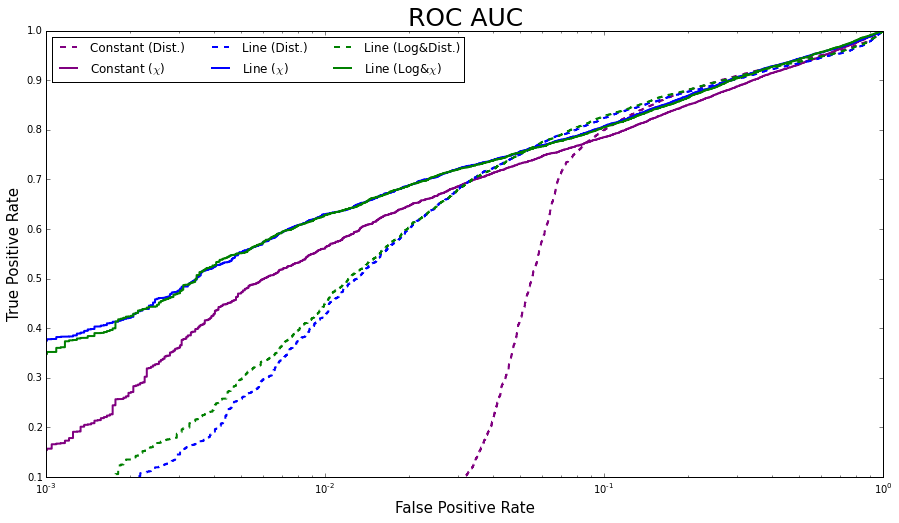

In [56]:
plt.figure(figsize=(15,8))
font = 'sans-serif'
plt.plot(fprDist1_1, tprDist1_1, '--', label='Constant (Dist.)', lw=2, color='purple')
plt.plot(fprChi1_1, tprChi1_1, label='Constant ($\chi$)', lw=2, color='purple')
plt.plot(fprDist2_1, tprDist2_1, '--', label='Line (Dist.)', lw=2, color='blue')
plt.plot(fprChi2_1, tprChi2_1, label='Line ($\chi$)', lw=2, color='blue')
plt.plot(fprDist2_2, tprDist2_2, '--',  label='Line (Log&Dist.)', lw=2, color='green')
plt.plot(fprChi2_2, tprChi2_2, label='Line (Log&$\chi$)', lw=2, color='green')
plt.title('ROC AUC', fontname=font, fontsize=25)
plt.xlabel('False Positive Rate', fontname=font, fontsize=15)
plt.ylabel('True Positive Rate', fontname=font, fontsize=15)
plt.xlim(1e-3,1);plt.ylim(1e-1,1)
plt.xscale('log');plt.yscale('linear')
plt.legend(loc='best', ncol=3)
plt.show(); plt.close()

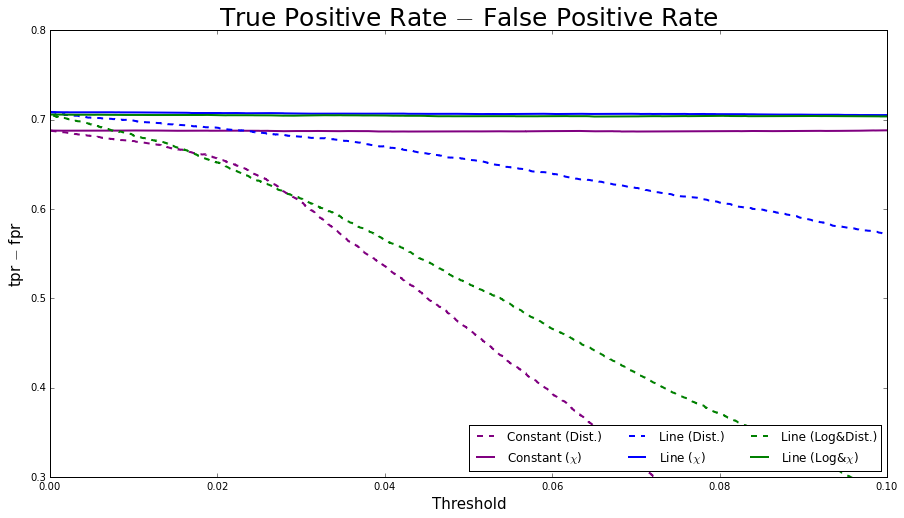

In [57]:
plt.figure(figsize=(15,8))
font = 'sans-serif'
plt.plot(threshDist1_1, tprDist1_1-fprDist1_1, '--', label='Constant (Dist.)', lw=2, color='purple')
plt.plot(threshChi1_1, tprChi1_1-fprChi1_1, label='Constant ($\chi$)', lw=2, color='purple')
plt.plot(threshDist2_1, tprDist2_1-fprDist2_1, '--', label='Line (Dist.)', lw=2, color='blue')
plt.plot(threshChi2_1, tprChi2_1-fprChi2_1, label='Line ($\chi$)', lw=2, color='blue')
plt.plot(threshDist2_2, tprDist2_2-fprDist2_2, '--',  label='Line (Log&Dist.)', lw=2, color='green')
plt.plot(threshChi2_2, tprChi2_2-fprChi2_2, label='Line (Log&$\chi$)', lw=2, color='green')
plt.title('True Positive Rate $-$ False Positive Rate', fontname=font, fontsize=25)
plt.xlabel('Threshold', fontname=font, fontsize=15)
plt.ylabel('tpr $-$ fpr', fontname=font, fontsize=15)
plt.xlim(0,0.1);plt.ylim(0.3,0.8)
plt.legend(loc='lower right', ncol=3)
plt.show(); plt.close()

The best-fit line for the rKronMag vs. (Log)psfKronRatio with $\chi$ scoring seems the best model for star/galaxy separation for the HST source.

## The best-fit line for the rKronMag vs. LogPsfKronRatio with $\chi$ scoring

In [58]:
def plt_hexbin_star_galaxy_with_threshold(xval1, yval1, xval2, yval2, extent, xlab, ylab, a, b, 
                           zval1=None, zval2=None, vmin=None, vmax=None, zlab=None, bins=None, 
                           xscale1='linear', yscale1='linear', xscale2='linear', yscale2='linear', grid=100):
    font = 'sans-serif'
    xp = np.arange(np.min(xval1), np.max(xval1), 0.1)
    plt.figure(figsize=(17,4))
    plt.subplot(1,2,1)
    plt.hexbin(xval1, yval1, zval1, vmin=vmin, vmax=vmax, extent=extent, cmap='gnuplot', bins=bins, gridsize=grid)
    plt.plot(xp, (xp-14.5)*a+b,  '--', lw=2, color='green')
    plt.xscale(xscale1); plt.yscale(yscale1)
    plt.xlim(extent[0:2]); plt.ylim(extent[2:4])
    plt.colorbar().set_label(zlab, fontname='serif', fontsize=15)
    plt.title('STAR', fontname=font, fontsize=25)
    plt.xlabel(xlab, fontname=font, fontsize=15)
    plt.ylabel(ylab, fontname=font, fontsize=15)
    plt.subplot(1,2,2)
    plt.hexbin(xval2, yval2, zval2, vmin=vmin, vmax=vmax, extent=extent, cmap='gnuplot', bins=bins, gridsize=grid)
    plt.plot(xp, (xp-14.5)*a+b,  '--', lw=2, color="green")
    plt.xscale(xscale2); plt.yscale(yscale2)
    plt.xlim(extent[0:2]); plt.ylim(extent[2:4])
    plt.colorbar().set_label(zlab, fontname='serif', fontsize=15)
    plt.title('GALAXY', fontname=font, fontsize=25)
    plt.xlabel(xlab, fontname=font, fontsize=15)
    plt.ylabel(ylab, fontname=font, fontsize=15)

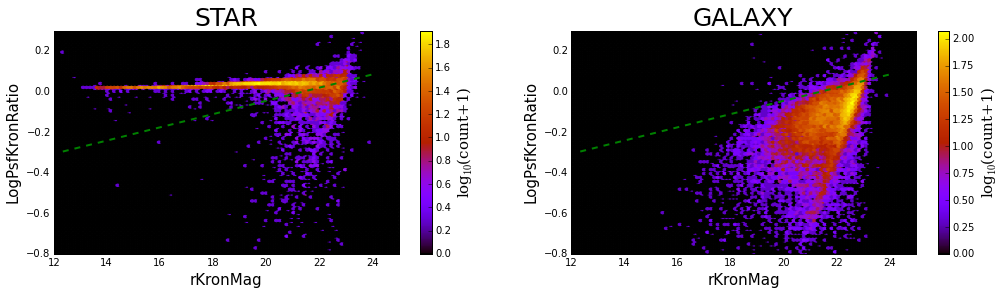

In [59]:
xval1 = PS_mag.rMeanKronMag[star&det]; yval1 = PS_mag.LogPsfKronRatio[star&det]
xval2 = PS_mag.rMeanKronMag[galaxy&det]; yval2 = PS_mag.LogPsfKronRatio[galaxy&det]
xlab = 'rKronMag'; ylab = 'LogPsfKronRatio'
extent = [12,25,-0.8,0.3]

plt_hexbin_star_galaxy_with_threshold(xval1, yval1, xval2, yval2, extent, xlab, ylab, 
                                      0.03257589, -0.2256163, zlab=zlab, bins='log')
plt.show(); plt.close()

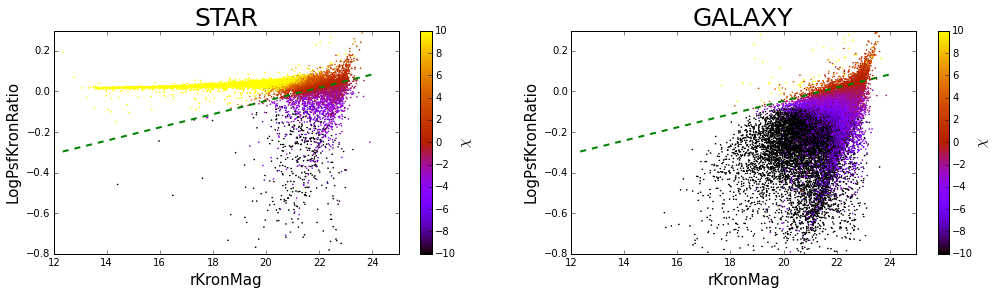

In [60]:
xval1 = PS_mag.rMeanKronMag[star&det]; yval1 = PS_mag.LogPsfKronRatio[star&det]
xval2 = PS_mag.rMeanKronMag[galaxy&det]; yval2 = PS_mag.LogPsfKronRatio[galaxy&det]
chi = calc_chi_from_thre(0.03257589, -0.2256163, 
                         PS_mag.rMeanKronMag, PS_mag.rMeanKronMagErr, PS_mag.LogPsfKronRatio, PS_mag.LogPsfKronRatioerr) 
xlab = 'rKronMag'; ylab = 'LogPsfKronRatio'
extent = [12,25,-0.8,0.3]

plt_hexbin_star_galaxy_with_threshold(xval1, yval1, xval2, yval2, extent, xlab, ylab, 
                                      0.03257589, -0.2256163, zval1 = chi[det&star], zval2=chi[det&galaxy] , vmin=-10, vmax=10, 
                                      zlab='$\chi$', grid=500)
plt.show(); plt.close()

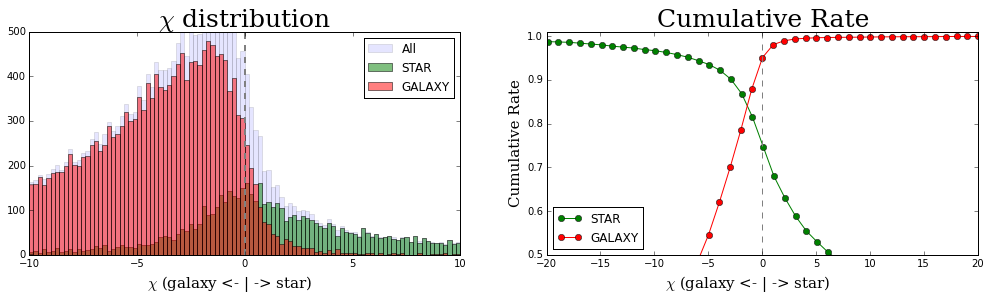

In [87]:
hist_star = plt.hist( -chi[det&star], bins=np.arange(np.min(-chi[det&star]),np.max(-chi[det&star]),1), cumulative=True, normed=True )
hist_galaxy = plt.hist( chi[det&galaxy], bins=np.arange(np.min(chi[det&galaxy]), np.max(chi[det&galaxy]),1), cumulative=True, normed=True )
plt.close()

plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
plt.hist(chi[det], range=(-10, 10), bins=100, alpha=0.1, label='All')
plt.xlim(-10, 10)
plt.ylim(0,500)
plt.hist(chi[det&star], range=(-10, 10), bins=100, alpha=0.5, label='STAR')
plt.hist(chi[det&galaxy], range=(-10, 10), bins=100, alpha=0.5, label='GALAXY')
plt.plot([0,0], [0,500], '--', lw=2, color='grey')
plt.title('$\chi$ distribution', fontname='serif', fontsize=25)
plt.xlabel('$\chi$ (galaxy <- | -> star)       ', fontname='serif', fontsize=15)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(-hist_star[1][1:len(hist_star[1])], hist_star[0], 'o-', label='STAR', color='green')
plt.plot(hist_galaxy[1][1:len(hist_galaxy[1])], hist_galaxy[0], 'o-', label='GALAXY', color='red')
plt.plot([0, 0], [0, 2], '--', color='grey')
plt.xlabel('$\chi$ (galaxy <- | -> star)       ' , fontname='serif', fontsize=15)
plt.ylabel('Cumulative Rate' , fontname='serif', fontsize=15)
plt.title('Cumulative Rate', fontname='serif', fontsize=25)
plt.legend(loc='best')
plt.xlim(-20, 20)
plt.ylim(0.5, 1.01)

plt.show();plt.close()

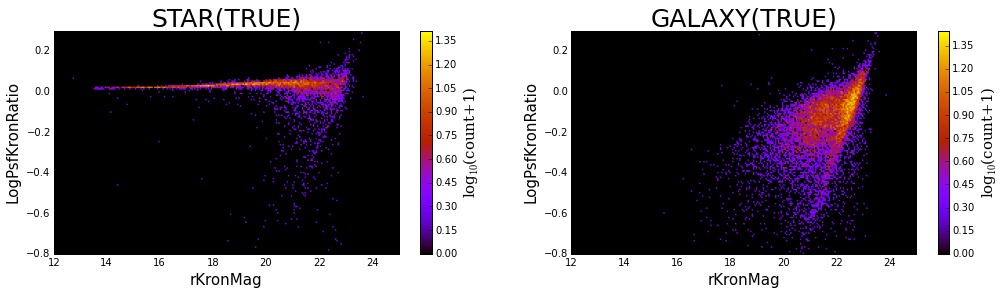

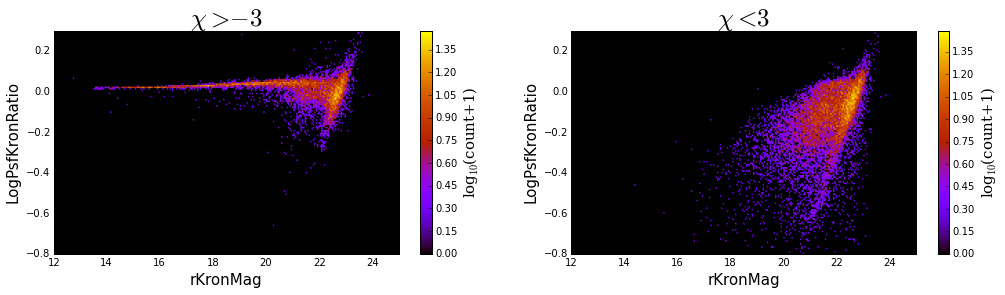

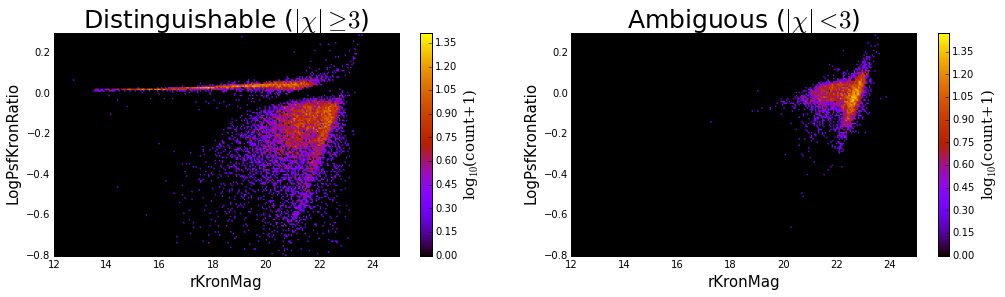

In [84]:
tol = 3 #3 sigma is corresponding 99.7% for the normal distribution
xval = PS_mag.rMeanKronMag[det]; yval = PS_mag.LogPsfKronRatio[det]
xlab = 'rKronMag'; ylab = 'LogPsfKronRatio'
extent = [12,25,-0.8,0.3]
star3 = chi[det] > -tol
galaxy3 = chi[det] < tol
plt_hexbin_star_galaxy(xval[det&star], yval[det&star], xval[det&galaxy], yval[det&galaxy], 
                       extent, xlab, ylab, bins='log', title1='STAR(TRUE)', title2='GALAXY(TRUE)', zlab=zlab, grid=250)
plt_hexbin_star_galaxy(xval[star3], yval[star3], xval[galaxy3], yval[galaxy3],
                       extent, xlab, ylab, bins='log', title1='$\chi > -3$', title2 = '$\chi < 3$',  zlab=zlab, grid=250)
plt_hexbin_star_galaxy(xval[np.abs(chi[det])>=3], yval[np.abs(chi[det])>=3], xval[np.abs(chi[det])<3], yval[np.abs(chi[det])<3],
                       extent, xlab, ylab, bins='log', title1='Distinguishable ($| \chi |\geq3$)', title2 = 'Ambiguous ($| \chi |<3$)',  zlab=zlab, grid=250)

In [63]:
thre_list = 10**np.arange(-2,3, 0.1)
ACU_list = []
for i in range(0, len(thre_list)-1):
    chi_mask = (thre_list[i] <= np.abs(chi))&(np.abs(chi) < thre_list[i+1])
    true = GT[det&chi_mask]
    pred = np.ones(len(GT)); pred[chi<0] = 0; pred = pred[det&chi_mask]
    ACU_list.append(accuracy_score(true, pred))

In [64]:
hist = plt.hist(np.abs(chi[det]), 
                bins=10**np.arange(np.log10(np.min(np.abs(chi[det]))), np.log10(np.max(np.abs(chi[det]))), 0.1), normed=True)
plt.close()

In [65]:
hist_bin = hist[1]
hist_dens = hist[0]
hist_bin = hist_bin[0:(len(hist_bin)-1)]
thre_bin = thre_list[0:(len(thre_list)-1)]

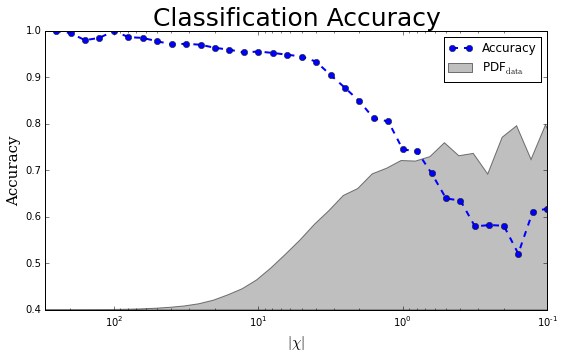

In [66]:
plt.figure(figsize=(9,5))
x = np.concatenate((hist_bin,hist_bin[::-1]) )
y = np.concatenate( (hist_dens, np.zeros(len(hist_dens))) )
plt.fill(x, 3*y+0.4, facecolor='grey', alpha=0.5, label='PDF$_{\mathrm{data}}$')
plt.plot(thre_list[0:(len(thre_list)-1)], ACU_list, 'o--', lw=2, label='Accuracy')
plt.xlabel('$|\chi|$' , fontname='serif', fontsize=15)
plt.ylabel('Accuracy' , fontname='serif', fontsize=15)
plt.title('Classification Accuracy', fontsize=25)
plt.xlim(300, 1e-1); plt.ylim(0.4, 1.0)
plt.xscale('log')
plt.legend(loc='best')
plt.show();plt.close()